# CARDIOVASCULAR DISEASE IN PEOPLE

###The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease
based on the given attributes.

Features:
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well
above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [3]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/CardioVascularDisease/cardio_train.csv",delimiter=";")

In [4]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#Data stats

In [5]:
df["cardio"].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df["gender"].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [10]:
df["gender"].describe()

count    69301.000000
mean         1.349519
std          0.476821
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64

In [11]:
df["height"].value_counts()

165    5801
160    4963
170    4627
168    4369
164    3365
       ... 
91        1
81        1
80        1
207       1
64        1
Name: height, Length: 108, dtype: int64

In [12]:
df["height"].describe()

count    69301.000000
mean       164.362217
std          8.205337
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [13]:
df["weight"].value_counts()

65.0    3826
70.0    3722
68.0    2802
75.0    2713
60.0    2678
        ... 
42.2       1
53.5       1
78.5       1
66.4       1
64.1       1
Name: weight, Length: 285, dtype: int64

In [14]:
df["weight"].describe()

count    69301.000000
mean        74.203027
std         14.383469
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [15]:
df["ap_hi"].value_counts()

120      27431
140       9406
130       8877
110       8550
150       4398
         ...  
11020        1
230          1
806          1
2000         1
93           1
Name: ap_hi, Length: 153, dtype: int64

In [16]:
df["ap_hi"].describe()

count    69301.000000
mean       128.829584
std        154.775805
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [17]:
df["ap_lo"].value_counts()

80      34513
90      14163
70      10137
100      4043
60       2705
        ...  
910         1
7099        1
1101        1
8079        1
7100        1
Name: ap_lo, Length: 157, dtype: int64

In [18]:
df["ap_lo"].describe()

count    69301.000000
mean        96.650092
std        189.096240
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [19]:

df["cholesterol"].value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

In [20]:
df["cholesterol"].describe()

count    69301.000000
mean         1.366806
std          0.680270
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cholesterol, dtype: float64

In [21]:
df["age"].value_counts()

18236    32
19741    32
18253    31
20376    31
20442    30
         ..
23057     1
21605     1
17831     1
17230     1
14329     1
Name: age, Length: 8069, dtype: int64

In [22]:
df["age"].describe()

count    69301.000000
mean     19468.786280
std       2467.261818
min      10798.000000
25%      17664.000000
50%      19704.000000
75%      21326.000000
max      23713.000000
Name: age, dtype: float64

#DATA VISUALISATION

Distribution of class

Distribution of the Classes in the subsample dataset
0    0.500411
1    0.499589
Name: cardio, dtype: float64


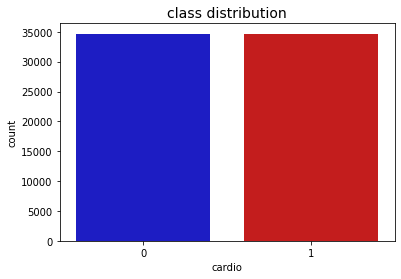

In [23]:
print('Distribution of the Classes in the subsample dataset')
print(df['cardio'].value_counts()/len(df))
colors = ["#0101DF", "#DF0101"]



sns.countplot('cardio', data=df, palette=colors)
plt.title('class distribution', fontsize=14)
plt.show()

In [24]:
df.shape

(69301, 13)

In [25]:
df=df.drop_duplicates(keep='first', inplace=False)
df.shape

(69301, 13)

In [26]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [27]:
x = df.copy(deep=True)
x.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


###BOX PLOTS

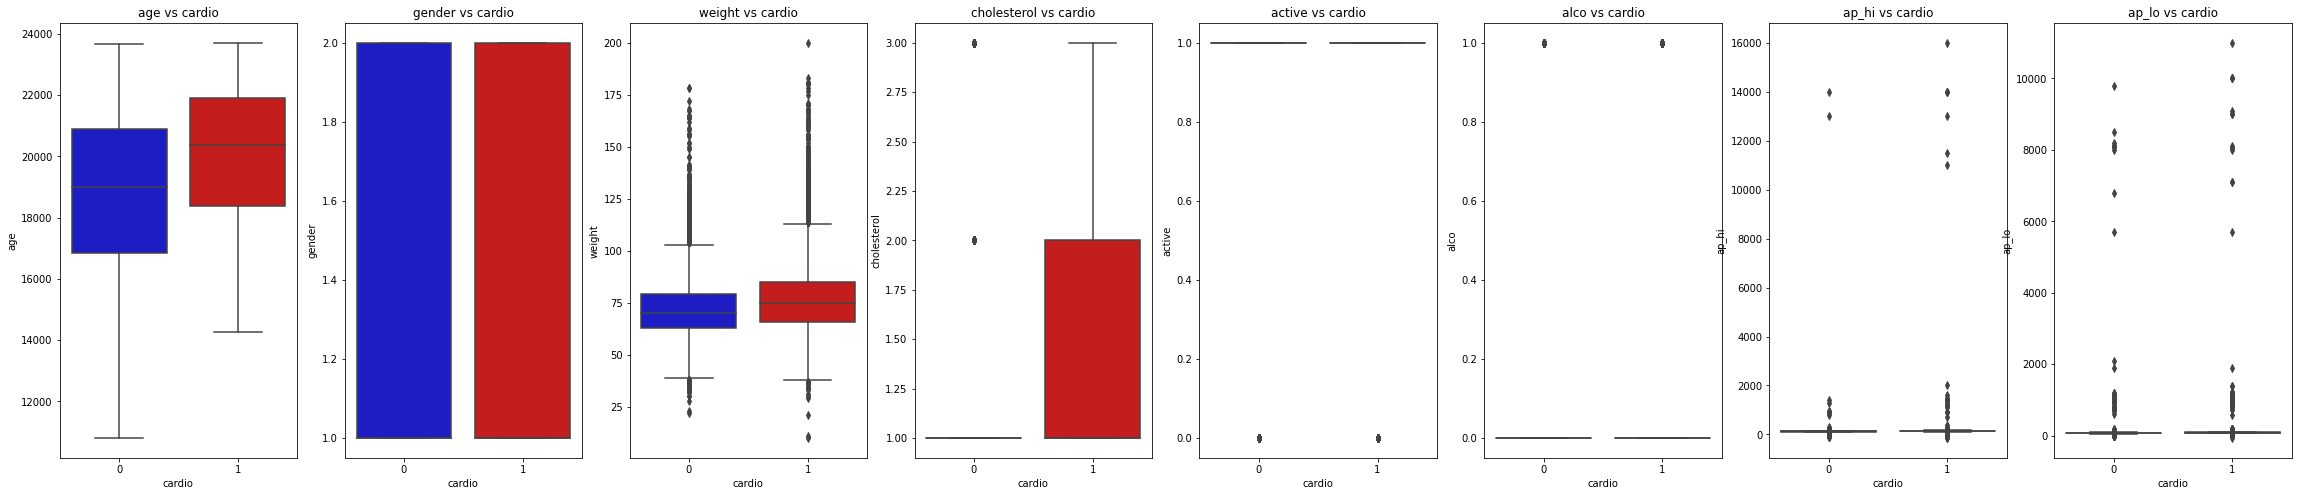

In [28]:
f, axes = plt.subplots(ncols=8, figsize=(40,8))


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="cardio", y="age", data=df, palette=colors, ax=axes[0])
axes[0].set_title('age vs cardio')

sns.boxplot(x="cardio", y="gender", data=df, palette=colors, ax=axes[1])
axes[1].set_title('gender vs cardio')


sns.boxplot(x="cardio", y="weight", data=df, palette=colors, ax=axes[2])
axes[2].set_title('weight vs cardio')


sns.boxplot(x="cardio", y="cholesterol", data=df, palette=colors, ax=axes[3])
axes[3].set_title('cholesterol vs cardio')


sns.boxplot(x="cardio", y="active", data=df, palette=colors, ax=axes[4])
axes[4].set_title('active vs cardio')


sns.boxplot(x="cardio", y="alco", data=df, palette=colors, ax=axes[5])
axes[5].set_title('alco vs cardio')


sns.boxplot(x="cardio", y="ap_hi", data=df, palette=colors, ax=axes[6])
axes[6].set_title('ap_hi vs cardio')


sns.boxplot(x="cardio", y="ap_lo", data=df, palette=colors, ax=axes[7])
axes[7].set_title('ap_lo vs cardio')


plt.show()

###OUTLIER REMOVAL

In [29]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = x[each].quantile(0.25)
    Q3 =x[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [30]:
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = x[outlier_filter]
x_outliers["cardio"].value_counts()

1    1999
0     385
Name: cardio, dtype: int64

OUTLIER DISTRIBUTION

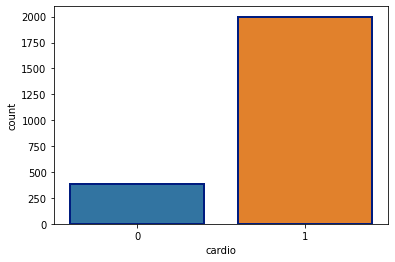

In [31]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

In [32]:
out_filter = ((x["ap_hi"]>250) | (x["ap_lo"]>200) )
print("There is {} outlier".format(x[out_filter]["cardio"].count()))

There is 983 outlier


In [33]:
x = x[~out_filter]

In [34]:

x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [35]:
x=x.drop("id",axis=1)

##CORRELATION BETWEEN FEATURES

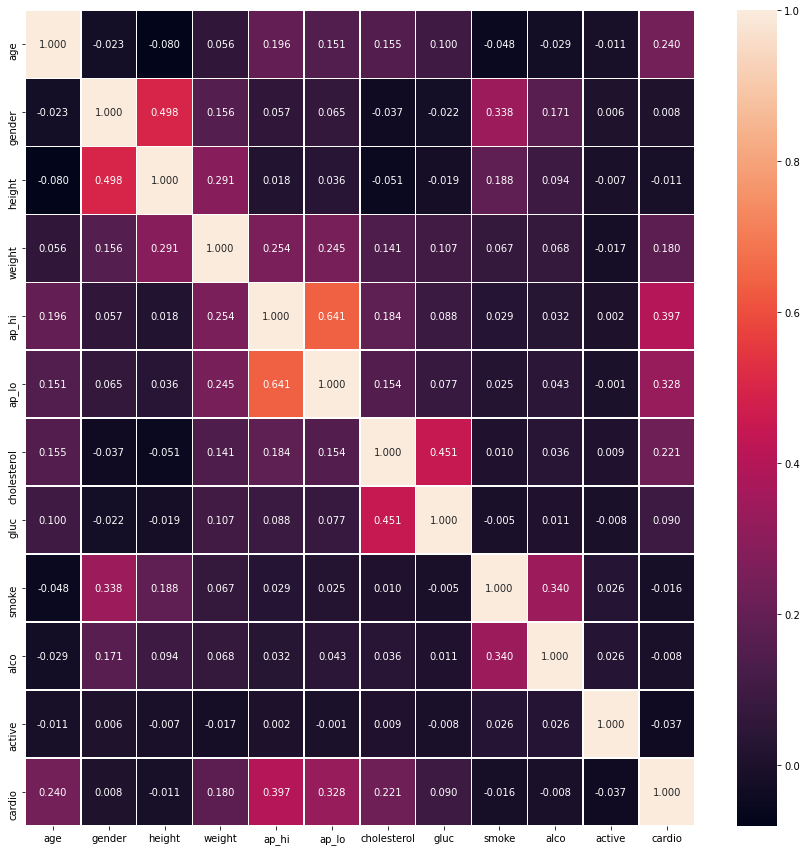

In [36]:
corr = x.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

#Feature engineering(Adding BMI)

In [37]:
x["bmi"] = x["weight"]/ (x["height"]/100)**2

In [38]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,28.720083
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,26.722873
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,25.711662
3,14549,2,165,85.0,120,80,1,1,1,1,1,0,31.221304
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [39]:
df.shape

(69301, 13)

##CONVERTING GENDER TO 1 and 0 as it has no order

In [40]:
x["gender"] = x["gender"] % 2

In [41]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,28.720083
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,26.722873
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,25.711662
3,14549,0,165,85.0,120,80,1,1,1,1,1,0,31.221304
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,25.806452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,0,168,76.0,120,80,1,1,1,0,1,0,26.927438
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69298,19066,0,183,105.0,180,90,3,1,0,1,0,1,31.353579
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


#Standardization of data

In [42]:
from sklearn.preprocessing import StandardScaler, RobustScaler




In [43]:
scalerage = StandardScaler()
x['age'] = scalerage.fit_transform(x['age'].values.reshape(-1,1))

In [44]:
meansage= scalerage.mean_ 
varsage = scalerage.var_ 

In [45]:
print(meansage)
print(varsage)

[19463.65184871]
[6093071.0416321]


In [46]:
scalerh = StandardScaler()
x['height'] = scalerh.fit_transform(x['height'].values.reshape(-1,1))

In [47]:
meansh= scalerh.mean_ 
varsh = scalerh.var_

In [48]:
print(meansh)
print(varsh)

[164.36243742]
[67.23122291]


In [49]:
scalerw = StandardScaler()
x['weight'] = scalerw.fit_transform(x['weight'].values.reshape(-1,1))

In [50]:
meansw= scalerw.mean_ 
varsw = scalerw.var_

In [51]:
print(meansw)
print(varsw)

[74.11506777]
[204.93397863]


In [52]:
scalerhi = StandardScaler()
x['ap_hi'] = scalerhi.fit_transform(x['ap_hi'].values.reshape(-1,1))

In [53]:
meanshi= scalerhi.mean_ 
varshi = scalerhi.var_

In [54]:
print(meanshi)
print(varshi)

[126.28772798]
[320.15338756]


In [55]:
scalerlo = StandardScaler()
x['ap_lo'] = scalerlo.fit_transform(x['ap_lo'].values.reshape(-1,1))

In [56]:
meanslo= scalerlo.mean_ 
varslo = scalerlo.var_

In [57]:
print(meanslo)
print(varslo)

[81.32988378]
[97.74929608]


In [58]:
scalerb = StandardScaler()
x['bmi'] = scalerb.fit_transform(x['bmi'].values.reshape(-1,1))

In [59]:
meansb= scalerb.mean_ 
varsb = scalerb.var_

In [60]:
print(meansb)
print(varsb)

[27.52261013]
[36.98118447]


In [61]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,1.217522,1,-1.141835,-0.357309,0.207473,-0.134511,2,2,0,0,1,0,0.196913
1,-1.950909,1,-0.166162,-0.217601,-0.910294,-1.145958,1,1,0,0,1,1,-0.131509
2,0.987414,1,0.077757,-0.287455,-0.351410,-0.134511,1,1,0,0,1,0,-0.297794
3,-1.991015,0,0.077757,0.760359,-0.351410,-0.134511,1,1,1,1,1,0,0.608216
4,1.591851,1,-1.141835,-0.846289,-0.351410,-0.134511,1,1,0,0,1,0,-0.282206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,-0.090605,0,0.443634,0.131671,-0.351410,-0.134511,1,1,1,0,1,0,-0.097871
69297,1.270997,1,-0.775958,3.624385,0.766356,0.876936,2,2,0,0,1,1,3.773928
69298,-0.161096,0,2.273022,2.157445,3.001888,0.876936,3,1,0,1,0,1,0.629968
69299,1.202127,1,-0.166162,-0.147747,0.486914,-0.134511,1,2,0,0,0,1,-0.069618


###BMI VS GENDER

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

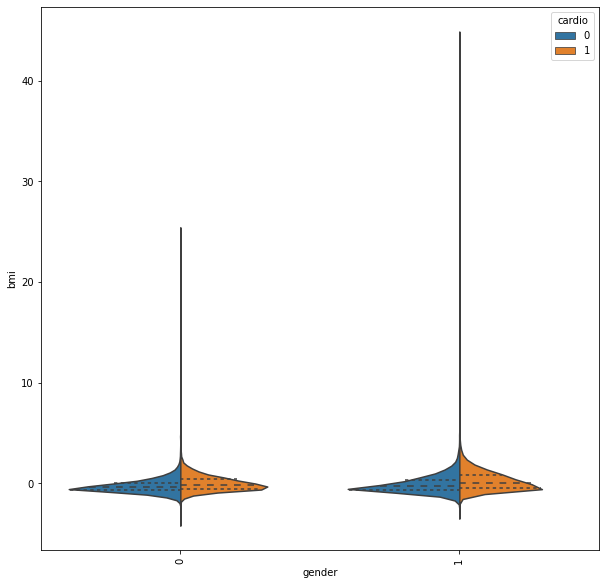

In [62]:
plt.figure(figsize=(10,10))
sns.violinplot(x="gender", y="bmi", hue="cardio", data=x,split=True, inner="quart")
plt.xticks(rotation=90)

In [63]:
df=x

# DIMENSIONALITY REDUCTION FOR VISUALIZATION

In [64]:

# New_df is from the random undersample data (fewer instances)
new_df=df.sample(2000)
X = new_df.drop('cardio', axis=1)
y =new_df['cardio']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 1.6e+01 s
PCA took 0.018 s
Truncated SVD took 0.01 s


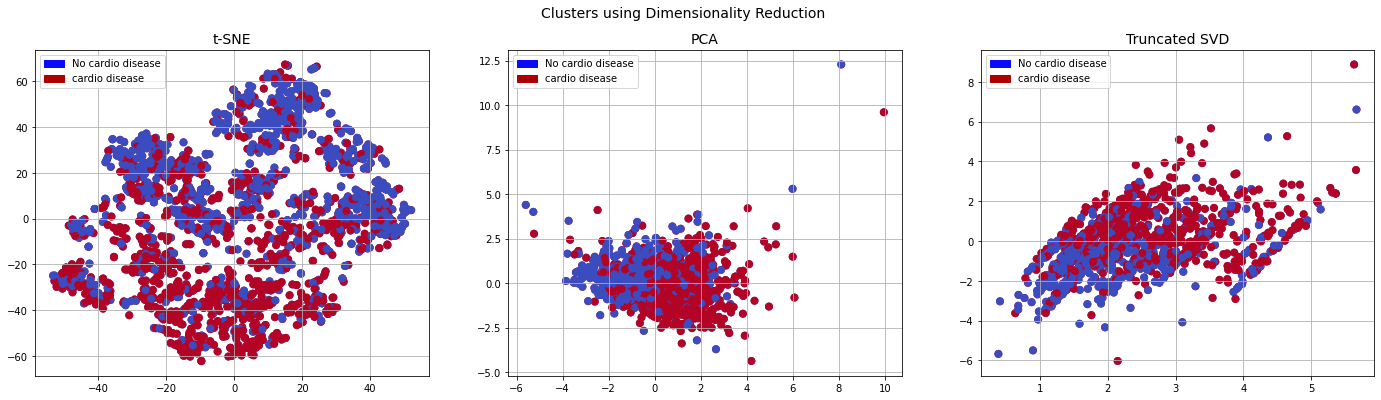

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No cardio disease')
red_patch = mpatches.Patch(color='#AF0000', label='cardio disease')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='no cardio disease', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No cardio disease', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No cardio disease', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='cardio disease', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])


In [ ]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0.755046,1,-0.909091,-0.176471,0.50,0.0,2,2,0,0,1,0,0.380123
1,-1.378342,1,-0.181818,-0.058824,-0.50,-1.0,1,1,0,0,1,1,0.060276
2,0.600109,1,0.000000,-0.117647,0.00,0.0,1,1,0,0,1,0,-0.101666
3,-1.405346,0,0.000000,0.764706,0.00,0.0,1,1,1,1,1,0,0.780686
4,1.007092,1,-0.909091,-0.588235,0.00,0.0,1,1,0,0,1,0,-0.086486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,-0.125750,0,0.272727,0.235294,0.00,0.0,1,1,1,0,1,0,0.093036
69297,0.791053,1,-0.636364,3.176471,1.00,1.0,2,2,0,0,1,1,3.863738
69298,-0.173213,0,1.636364,1.941176,3.00,1.0,3,1,0,1,0,1,0.801870
69299,0.744681,1,-0.181818,0.000000,0.75,0.0,1,2,0,0,0,1,0.120552


In [65]:

X = df.drop(columns=['cardio'], axis=1)
y =df['cardio']

#Splitting of data

In [66]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

##Model without hyperparameter tuning

In [ ]:
# Let's implement simple classifiers

ran = RandomForestClassifier(n_estimators=100)

naive = GaussianNB()


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random forest" : ran,
    "Naive bayes" : naive}



###Scores

In [ ]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 73.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 70.0 % accuracy score
Classifiers:  SVC Has a training score of 73.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 63.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 71.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 70.0 % accuracy score


###10 fold cross val

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=X_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=KNeighborsClassifier(), X=X_train, y=y_train, cv=10)

As standard deviation of scores is less ,it implies data is uniform and consistent

In [ ]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.713177620683664
Random Forest Standart Deviation:  0.0032192866998662023
KNN Average accuracy:  0.695832408544679
KNN Standart Deviation:  0.0055847758096744145


Function for plotting confusion matrix

In [74]:
from sklearn.metrics import confusion_matrix
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##Model with hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


In [ ]:
ylog=log_reg.predict(X_test)

In [ ]:
score = accuracy_score(y_test, ylog)
score

0.7223360655737705

Confusion matrix, without normalization
[[5339 1572]
 [2222 4531]]


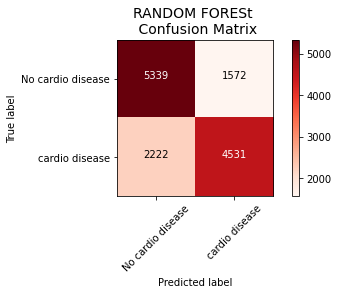

In [ ]:
labels = ['No cardio disease', 'cardio disease']
cm = confusion_matrix(y_test, ylog)
plot_confusion_matrix(cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

In [ ]:
print('LOG REG Classifier:')
print(classification_report(y_test,ylog))

Neural network Classifier:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6911
           1       0.74      0.67      0.70      6753

    accuracy                           0.72     13664
   macro avg       0.72      0.72      0.72     13664
weighted avg       0.72      0.72      0.72     13664



In [ ]:

knears_params = {"n_neighbors": [1,3,5,7,9,11,13,21,27,33,41,51,99], 'algorithm': ['auto']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [ ]:
yknn=knears_neighbors.predict(X_test)

In [ ]:
score = accuracy_score(y_test, yknn)
score

0.7240193208430913

Confusion matrix, without normalization
[[5401 1510]
 [2261 4492]]


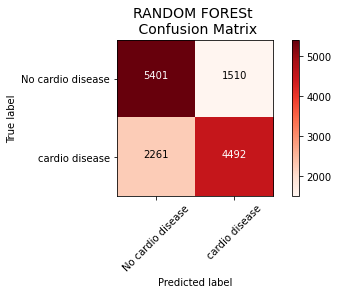

In [ ]:
labels = ['No cardio disease', 'cardio disease']
cm = confusion_matrix(y_test, yknn)
plot_confusion_matrix(cm, labels, title="KNN \n Confusion Matrix", cmap=plt.cm.Reds)

In [ ]:
print('knn Classifier:')
print(classification_report(y_test,yknn))

knn Classifier:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6911
           1       0.75      0.67      0.70      6753

    accuracy                           0.72     13664
   macro avg       0.73      0.72      0.72     13664
weighted avg       0.73      0.72      0.72     13664



In [68]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
model = GridSearchCV(RandomForestClassifier(max_features='sqrt'),param_grid,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))
  #max_depth =50
  #base_learners=120
'''RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False);'''

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7927578418016565


"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=10, max_features='sqrt',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=120,\n                       n_jobs=None, oob_score=False, random_state=None,\n                       verbose=0, warm_start=False);"

In [69]:
randomf = model.best_estimator_
randomf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
import pickle

In [71]:
filename = '/content/drive/My Drive/Colab Notebooks/CardioVascularDisease/cardio-prediction-rfc-model2.pkl'
pickle.dump(randomf, open(filename, 'wb'))

In [72]:
yrf=randomf.predict(X_test)

Confusion matrix, without normalization
[[5435 1476]
 [2223 4530]]


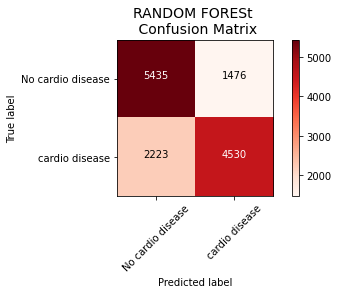

In [75]:
labels = ['No cardio disease', 'cardio disease']
cm = confusion_matrix(y_test, yrf)
plot_confusion_matrix(cm, labels, title="RANDOM FORESt \n Confusion Matrix", cmap=plt.cm.Reds)

In [76]:
print('rf Classifier:')
print(classification_report(y_test,yrf))

rf Classifier:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6911
           1       0.75      0.67      0.71      6753

    accuracy                           0.73     13664
   macro avg       0.73      0.73      0.73     13664
weighted avg       0.73      0.73      0.73     13664



In [ ]:
from xgboost import XGBClassifier
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
clf = XGBClassifier(booster='gbtree')
model=GridSearchCV(estimator = clf,param_grid=param_grid ,cv = 3,scoring='roc_auc',return_train_score=True)
model.fit(X_train,y_train)
print('optimal depth : ',model.best_estimator_.max_depth)
print('optimal n_estimator : ',model.best_estimator_.n_estimators)
#optimal n_estimator :  60
#optimal depth :  5


In [ ]:
xgb= XGBClassifier(booster='gbtree',depth=5,n_estimator=60)

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
yxg=xgb.predict(X_test)

In [ ]:
score = accuracy_score(y_test, yxg)
score

In [ ]:
labels = ['No cardio disease', 'cardio disease']
cm = confusion_matrix(y_test, yxg)
plot_confusion_matrix(cm, labels, title="RANDOM FORESt \n Confusion Matrix", cmap=plt.cm.Reds)

In [ ]:
print('xgboost Classifier:')
print(classification_report(y_test,yxg))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
tree_parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100], \
'min_samples_split': [5, 10, 100, 500]}
dt_output = DecisionTreeClassifier(class_weight='balanced')
clf = GridSearchCV(dt_output, tree_parameters, cv=10, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_train,y_train)

print(clf.best_estimator_)
print(clf.score(X_test, y_test))
'''DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.7946901438858957'''

In [ ]:
ydt=clf.predict(X_test)

Confusion matrix, without normalization
[[5138 1797]
 [1921 5005]]


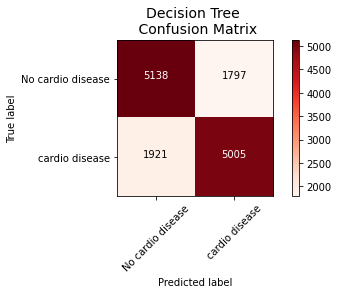

In [ ]:
labels = ['No cardio disease', 'cardio disease']
cm = confusion_matrix(y_test, ydt)
plot_confusion_matrix(cm, labels, title="Decision Tree \n Confusion Matrix", cmap=plt.cm.Reds)

In [ ]:
print('knn Classifier:')
print(classification_report(y_test,ydt))

knn Classifier:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      6935
           1       0.74      0.72      0.73      6926

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861



In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


In [ ]:
from sklearn import preprocessing, model_selection

In [ ]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [ ]:

from keras.layers.normalization import BatchNormalization


In [ ]:
from keras.layers import Dropout
n_inputs = X_train.shape[1]
model=Sequential()

model.add(Dense(2048, input_dim=n_inputs, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 44352 samples, validate on 11088 samples
Epoch 1/20
 - 24s - loss: 0.7047 - accuracy: 0.6082 - val_loss: 0.6539 - val_accuracy: 0.6163
Epoch 2/20
 - 24s - loss: 0.6217 - accuracy: 0.6683 - val_loss: 0.5969 - val_accuracy: 0.7128
Epoch 3/20
 - 27s - loss: 0.5784 - accuracy: 0.7120 - val_loss: 0.5666 - val_accuracy: 0.7246
Epoch 4/20
 - 23s - loss: 0.5656 - accuracy: 0.7220 - val_loss: 0.5605 - val_accuracy: 0.7240
Epoch 5/20
 - 23s - loss: 0.5606 - accuracy: 0.7243 - val_loss: 0.5528 - val_accuracy: 0.7264
Epoch 6/20
 - 23s - loss: 0.5557 - accuracy: 0.7279 - val_loss: 0.5530 - val_accuracy: 0.7266
Epoch 7/20
 - 23s - loss: 0.5542 - accuracy: 0.7305 - val_loss: 0.5519 - val_accuracy: 0.7263
Epoch 8/20
 - 23s - loss: 0.5515 - accuracy: 0.7314 - val_loss: 0.5500 - val_accuracy: 0.7302
Epoch 9/20
 - 23s - loss: 0.5506 - accuracy: 0.7310 - val_loss: 0.5467 - val_accuracy: 0.7335
Epoch 10/20
 - 23s - loss: 0.5503 - accuracy: 0.7309 - val_loss: 0.5482 - val_accuracy: 0.7316
Epoch 11/

In [ ]:
predictions = model.predict_classes(X_test, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[5455 1480]
 [2246 4680]]


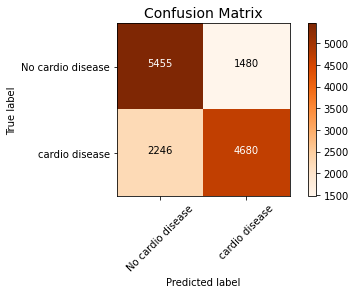

In [ ]:
from sklearn.metrics import confusion_matrix
cmnn = confusion_matrix(y_test, predictions)

labels = ['No cardio disease', 'cardio disease']


plot_confusion_matrix(cmnn, labels, title="Confusion Matrix", cmap=plt.cm.Oranges)


In [ ]:
print('knn Classifier:')
print(classification_report(y_test,predictions))

knn Classifier:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6935
           1       0.76      0.68      0.72      6926

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861

